# Problem Set 2 (93 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

## Submatrices (bonus).


Let $U$ be an $n \times r$ orthogonal matrix, $n \geq r$. It is well known, that such matrix has $r \times r$ non-singular submatrix $\hat{U}$. To measure ``non-singularity'' of this submatrix one can use the minimal singular value, or the norm of the inverse $\Vert \hat{U}^{-1} \Vert.$

Suppose we select the submatrix that has the smallest possible norm of the inverse among all $r \times r$ submatrices of $U$. What is the maximal value of such norm? Mathematically, we need to estimate

$$t(n, r) = \max_U \min_{\hat{U}} \Vert \hat{U}^{-1} \Vert_2.$$

Is it true that $t(n, r) \leq \sqrt{n}$?




The proof is obvious and is left as an exercise for the reader (just joke)

You might be interested in looking at the articles I found to solve this problem. I didn't have time to solve it(

[The min-max theorem, or variational theorem, or Courant–Fischer–Weyl min-max principle](https://en.wikipedia.org/wiki/Min-max_theorem)

Theorem 1 (Cauchy Interlace Theorem). Let A be a Hermitian matrix of order n,
and let B be a principal submatrix of A of order n − 1. If λn ≤ λn−1 ≤···≤ λ2 ≤ λ1
lists the eigenvalues of A and µn ≤ µn−1 ≤···≤ µ3 ≤ µ2 the eigenvalues of B, then
λn ≤ µn ≤ λn−1 ≤ µn−1 ≤···≤ λ2 ≤ µ2 ≤ λ1.

[Cauchy interlace theorem](http://matrix.skku.ac.kr/Series-E/Monthly-E.pdf)

[How to find a good submatrix](https://www.researchgate.net/profile/Ivan-Oseledets/publication/251735015_How_to_Find_a_Good_Submatrix/links/628340177da61013d7484c01/How-to-Find-a-Good-Submatrix.pdf)

# Problem 1 (QR algorithm) (22 pts)

One of the way to find eigenvalues for real matrix $A$ of size $(n,n)$ is **QR algorithm**. Each iteration of the algorithm consists of two main steps:

1. Compute QR decompostion $A_k = Q_kR_k$
2. Compute new matrix $A_{k+1} = R_kQ_k$

$A_0 = A$

From lecture materials you have seen that algorithm complexity in general is $O(Nn^3)$ ($N$ - number of iterations). But we can make an improvement by transforming matrix to **Upper Hessenberg form** ([link](https://en.wikipedia.org/wiki/Hessenberg_matrix)) before running the algorithm. 

The good property of Hessenberg matrix is preservation of its structure during QR algorithm iteration. In other words, if $A_{k}$ is Hessenberg matrix, then $A_{k+1}$ will also be a Hessenberg matrix. We can use this property to reduce complexity of each iteration. Since we need only to zero first lower subdiagonal for QR factorization (first step in each iteration) we can use **Givens rotations** $O(n^2)$ instead of **Householder reflections** $O(n^3)$. Now, the last question is how to obtain Hessenberg matrix - use Householder reflections. Since it is done only once (initialization stage), complexity of algorithm will not be increased.

Final algorithm:

I. **Initialization**

> - Transform original matrix $A$ to Hessenberg form $H_0 = U^TAU$ using Householder reflections.

II. **Loop**

> **for** k in range(**N**):
> -  Compute QR using Givens rotation: such matrices $Q_k,R_k$ that $H_k = Q_kR_k$

> - Update matrix $H_{k+1} = R_k Q_k$



## What do you need to do:
### Theoretical part
<!-- 1. For real square metrices $Q,A,\hat{A}$ prove that if we have relation $A = Q^T\hat{A}Q$ ($Q$ - orthogonal matrix) then eigenvalues of $A$ and $\hat{A}$ are equal. **(3 pts)**
2. Suppose we factorize real square matrix $A = Q^TTQ$, where $Q$ is orthogonal and $T$ is upper/lower triangular matrix. Describe the easiest way to find eigenvalues of $A$. **(2 pts)** -->
1. Show that Hessenberg matrix preserves its structure under QR algorithm: if $A_k$ hessenberg matrix then $A_{k+1}$ hessenberg as well. **(5 pts)**

2. **(Bonus task)** For real square matrix $A$, which all leading minors are nondegenerate, prove that QR algorithm converges to upper triangular matrix: $\lim\limits_{k\rightarrow \infty} A_k = T$, where $T$ - upper triangular matrix.

### Practical part

1. Implement function **Hessenberg_Transform** which takes a real square matrix $A$ and returns transformed matrix in Hessenberg form $H$ (use householder reflections). **(5 pts)**

2. Implement function **QR_givens** which takes a real square matrix in Hessenberg form $H$ and returns QR factorization: matrices $Q$ and $R$. **(5 pts)**

3. Implement function **QR_algorithm**, which takes a real square matrix $A$ and returns $H_{N}$ - the result of $N$ iterations of QR algorithm. Use previously implemented **Hessenberg_Transform** to get Hessenberg form of matrix $A$, and  **QR_givens** to make QR factorization on each iteration. **(2 pts)**

4. Varing parameter $n$ generate random matrix of size $(n,n)$ and measure the computation time of **QR_algorithm** function. Plot observed data: computation time versus $n$. Use logarithmic scale for both axes. Explain obtained results.**(3 pts)**

5. Compare eigenvalues computed using your implemented algorithm and standard numpy functionality for some random matrix. Try different number of iterations for the algorithm. Explain results. **(2 pts)**

### Bonus task


In [141]:
#Counterexample for bonus task. 
import numpy as np

N_iterations = 1000

A = np.array([[1,2,4,1],
              [1,-1,4,1],
              [1,1,1,1],
              [0,5,-1,1]])

print(f'A = \n {A}')

A_buf = np.copy(A)

lead_mins = [A[0][0]]

determ = np.linalg.det(A)
print(f'Determinant of A equal {determ}')

for i in range(1, A.shape[0]-1):
  row = np.delete(A_buf, [i+1, A.shape[0]-1] ,axis=0) 
  row_col = np.delete(row, [i+1, A.shape[0]-1] ,axis=1)
  lead_mins.append(np.linalg.det(row_col))

print('Leadind minors')
print(lead_mins)

eigvals,_ = np.linalg.eig(A)
print('Eigenvalues', eigvals)

A = 
 [[ 1  2  4  1]
 [ 1 -1  4  1]
 [ 1  1  1  1]
 [ 0  5 -1  1]]
Determinant of A equal 9.000000000000002
Leadind minors
[1, -3.0000000000000004, 9.000000000000002]
Eigenvalues [ 5.1000992 +0.j          0.49275719+0.j         -1.7964282 +0.59503365j
 -1.7964282 -0.59503365j]


In [142]:
for i in range(1000):
    Q_in,R_in = np.linalg.qr(A)
    A = R_in @ Q_in

A = np.around(A, decimals = 6)
A

array([[ 5.100099,  0.35044 , -3.39209 , -0.651296],
       [ 0.      , -2.970992,  1.482818, -4.359864],
       [ 0.      , -1.169169, -0.621864, -1.380318],
       [ 0.      ,  0.      ,  0.      ,  0.492757]])

---

**In the counter-example, it turns out that the leading minors are not degenerate, which means that the matrix in this algorithm is not triangular. But for all that, the real eigenvalues of this matrix are located on the main diagonal of the matrix after the algorithm. Further, we can see that the complexes can be computed from the subdiagonal submatrices.  With degenerate minors, all eigenvalues will be valid and will lie on the main diagonal, which means that the matrix will be triangular**

----

### Theoretical proofs
If A is a Hessenberg matrix, then the derivative Q is also a Hessenberg matrix. 

The upper triangular matrix multiplied by the Hessenberg matrix will still be the Hessenberg matrix.


$$RQ=\sum_{i,j=1}^{n} r_{j}q_{j,k}$$

If we assume that one of the values $q_{jk}$б$r_{ij}$ is zero
$$q_{j,k}=0 \text{, if } j\geq k+2$$
$$r_{i,j}=0 \text{, if } j\leq i-1$$


This means that for $i \geq k+2 \quad r_{ij}q_{jk}=0$ there is Hessenberg matrix.


In [ ]:
import numpy as np

In [ ]:
def Hessenberg_Transform(A):
    
    H = A
    
    def column_convertor(x):
        """ Converts 1d array to column vector"""
        x.shape = (1, x.shape[0])
        return x
    
    def householder_transformation(v):
        """ Returns Householder matrix for vector v """
        size_of_v = v.shape[1]
        e1 = np.zeros_like(v)
        e1[0, 0] = 1
        vector = np.sqrt(np.sum(np.square(v))) * e1
        if v[0, 0] < 0:
            vector = - vector
        u = (v + vector).astype(np.float32)
        """hr - householser reflector"""
        hr = np.identity(size_of_v) - ((2 * np.matmul(np.transpose(u), u)) / np.matmul(u, np.transpose(u)))
        return hr
    
    def house_holder_apply(M, i):
        v = column_convertor(M[i+1:, i])
        hr = householder_transformation(v)
        """HM - householder matrix"""
        HM = np.identity(M.shape[0])
        HM[i+1:, i+1:] = hr
        M = np.matmul(HM,M)
        M = np.matmul(M,HM)
        return M
        
    for i in range(min(H.shape[0], H.shape[1])-2):
        H = house_holder_apply(H, i)
    
    H = np.around(H, decimals=6)
    return H

In [ ]:
def QR_givens(H):
    def _givens_rotation_matrix_entries(a, b):
        """Compute matrix entries for Givens rotation."""
        r = np.power(a*a + b*b, 0.5)
        c = a/r
        s = -b/r

        return c, s
    """
    Perform QR decomposition of matrix A using Givens rotation.
    It's only unique up to the signs of the rows of R. If you want to enforce positive diagonals of R, and thereby get a unique factorisation, construct
    D = diag(sign(diag(R)));
    Qunique = Q*D; Runique = D*R;
    """
    num_rows, num_cols = np.shape(H)

    # Initialize orthogonal matrix Q and upper triangular matrix R.
    Q = np.identity(num_rows)
    R = np.copy(H)

    # Iterate over lower triangular matrix.
    rows, cols = np.tril_indices(num_rows, -1, num_cols)
    for row, col in zip(rows, cols):

        # Compute Givens rotation matrix and
        # zero-out lower triangular matrix entries.
        if R[row, col] != 0:
            (c, s) = _givens_rotation_matrix_entries(R[col, col], R[row, col])

            G = np.identity(num_rows)
            G[[col, row], [col, row]] = c
            G[row, col] = s
            G[col, row] = -s
            #D = np.diag(np.sign(np.diag(R)))
            R = np.dot(G, R)
            #R = D @ R
            Q = np.dot(Q, G.T)
            #Q = Q @ D

    return Q, R

In [ ]:
def QR_algorithm(A, N_iterations):
    H = Hessenberg_Transform(A)
    for i in range(N_iterations):
        Q,R = QR_givens(H)
        H = R @ Q
    H = np.around(H, decimals=6)
    return H

In [ ]:
# A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])

n = 4

A = np.random.randn(n, n)

N_iterations = 100

A_alg = A
A_in = A

H = QR_algorithm(A_alg,N_iterations)

for i in range(N_iterations):
        Q_in,R_in = np.linalg.qr(A_in)
        A_in = R_in @ Q_in
        
np.around(H, decimals=6), np.around(A_in, decimals=6)


(array([[-0.358664,  2.435477,  0.889128,  0.324423],
        [-1.065199,  0.446707, -0.461399,  0.871572],
        [ 0.      ,  0.      ,  1.318672,  1.428187],
        [ 0.      , -0.      ,  0.      , -0.962572]]),
 array([[-0.358679,  2.435468,  0.889133,  0.324414],
        [-1.065207,  0.446721, -0.46139 ,  0.871575],
        [-0.      ,  0.      ,  1.318672,  1.428188],
        [-0.      , -0.      , -0.      , -0.962573]]))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

time_range = []
dim_range = [5*i for i in range(1, 11)]
for n in dim_range:
    print("Dimension = {}".format(n))
    A = np.random.randn(n, n)
    t = %timeit -o -q QR_algorithm(A, 1000)
    time_range.append(t.best)
    print("Time = {}".format(t.best))

Dimension = 5
Time = 0.21869841800000245
Dimension = 10


KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Time vs. Dimension for QR-algorithm')

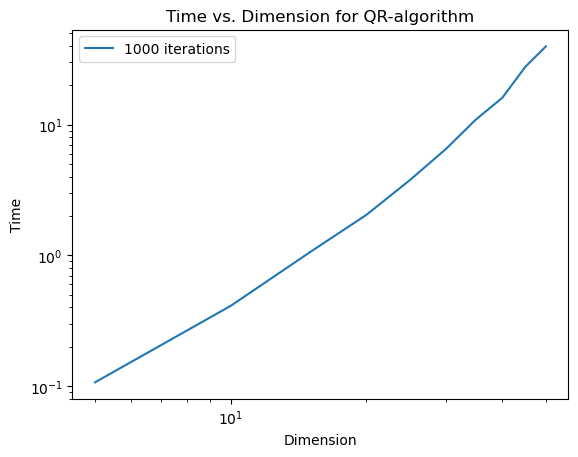

In [ ]:
plt.plot(dim_range, time_range, label="1000 iterations")
plt.legend()
plt.xlabel("Dimension")
plt.ylabel("Time")
plt.xscale("log")
plt.yscale("log")
plt.title("Time vs. Dimension for QR-algorithm");

In [ ]:
n = 5

A = np.random.randn(n, n)

N_iterations = 100000

A_alg = A
A_in = A

H = QR_algorithm(A_alg,N_iterations)

# eigs_alg,_ = np.linalg.eig(H)
# eigs_in,_ = np.linalg.eig(A_in)

# eigs_alg, eigs_in

In [ ]:
H

array([[-2.648942,  1.009401, -1.674576, -0.410224, -0.112814],
       [-0.      ,  1.443175, -1.499467, -0.181031,  0.925161],
       [-0.      ,  0.177633,  1.032513, -0.678177,  1.766782],
       [-0.      ,  0.      ,  0.      , -1.236671,  1.25733 ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.732328]])

In [ ]:
def eigs_block_detect(H):
    eigs_block = []
    eigs_not_block = []
    k = None
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            if i==j:
                eigs_not_block.append(H[i][j])
    for i in range(H.shape[0]-1):
        if H[i+1][i] != 0.:
            H_block = H[i:i+2, i:i+2]
            eigs_block, _= np.linalg.eig(H[i:i+2, i:i+2])
            eigs_not_block.remove(H[i][i])
            eigs_not_block.remove(H[i+1][i+1])
    for i in range(len(eigs_block)):
        eigs_not_block.append(eigs_block[i])
    return eigs_not_block
    

eigs_list = eigs_block_detect(H)

In [ ]:
eigs_list

[-2.648942,
 -1.236671,
 0.732328,
 (1.237844+0.4734912903634025j),
 (1.237844-0.4734912903634025j)]

In [ ]:
eigs_lib,_ = np.linalg.eig(H)

eigs_list = sorted(eigs_list, reverse = True)
eigs_lib =  sorted(eigs_lib, reverse = True)

eigs_list, eigs_lib

([(1.237844+0.4734912903634025j),
  (1.237844-0.4734912903634025j),
  0.732328,
  -1.236671,
  -2.648942],
 [(1.237844+0.4734912903634025j),
  (1.237844-0.4734912903634025j),
  (0.732328+0j),
  (-1.236671+0j),
  (-2.648942+0j)])

In [ ]:
def RMSE_func(y_pred, y_true):
    sum_mse = 0
    if len(y_pred)==len(y_true):
        for i in range(len(y_pred)):
            sum_mse += (y_pred[i]**2 - y_true[i]**2)/len(y_pred)
    return sum_mse

In [ ]:
RMSE_func(eigs_list, eigs_lib)

0j

# Problem 2 (Stochastic trace estimation) (30 pts) 

In this problem we consider stochastic estimation of trace for implicitly-defined matrices.

Impicitly-defined matrices are such that matrix-vector multiplication is easy to perform, but matrix entries are not easy to obtain (examples are given by integral kernels, products of sparse matrices, products of a set of circulants, low-rank matrices given in a compressed form, etc).

In such cases it is often possible to approximate trace with $k\ll N$ matrix-vector products, where $N$ is the size of matrix.

One popular way to obtain stochastic estimate is Hutchinson algorithm.

## Hutchinson algorithm
Let $u$ be a random vector from $\mathbb{R}^{n}$ with independent identicaly distributed entries $u_i$ each having zero mean and variance $\sigma^2$.

Let $B$ be a symmetric matrix from $\mathbb{R}^{n\times n}$.

Hutchinson algorithm is roughly as follows:

    trace_estimate = 0
    for i=1:N do
        u = random_vector
        trace_estimate += (u,Bu)
    end do
    trace_estimate /= N

So Hutchinson algorithm uses empirical mean $u^\top B u$ as a trace estimation. Below we ask you to find properties of this estimator.

**Subproblem 1 (5 pts)**

1. Show that $\mathbb{E}\left[u^\top B u\right] = \sigma^2 \text{tr} B$, where $\mathbb{E}\left[\cdot\right]$ denotes average wrt $u$.

---

We know that $B$ is a symmetric matrix and it's means that we can rewrite equation elementwise like

$$u^T B u = \sum^n_{i,j} u_{i} b_{i,j} u_{j} = \sum^n_{i,j} b_{i,j} u_{i}  u_{j}$$

And 

$$ \mathbb{E}\left[u^\top B u\right] = \mathbb{E} \left[ \sum^n_{i, j} u_i b_{i,j} u_j \right] =  \sum^n_{i, j}  \mathbb{E} \left[ u_i b_{i,j} u_j \right]  $$

Then, according to first raw we can say that

$$\sum^n_{i, j}  \mathbb{E} \left[ u_i b_{i,j} u_j \right]  = \sum^n_{i, j}  \mathbb{E} \left[b_{i,j} u_i  u_j \right] =  \sum^n_{i, j} b_{i,j} \mathbb{E} \left[ u_i  u_j \right]$$

$$ \sum^n_{i, j} b_{i,j} \mathbb{E} \left[ u_i  u_j \right] = \sum^n_{i = j} b_{ij} \mathbb{E} \left[ u_i^2 \right] + \sum^n_{i, j} b_{i \neq j} \mathbb{E}\left[ u_i \right] \mathbb{E} \left[ u_j \right] $$

We know that $ \mathbb{E} \left[ u \right] = 0$

$$\sum^n_{i = j} b_{ij} \mathbb{E} \left[ u_i^2 \right]  = \sum^n_{i = j} b_{ij} \sigma^2 = \sigma^2 \sum^n_{i} b_{ii} = \sigma^2 \text{tr}B$$

---

2. Show that $\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}B_{ii}^2$, where $\text{var}$ denotes [variance](https://en.wikipedia.org/wiki/Variance).

---
By definition, $\text{var}\left[u^T B u\right] = \mathbb{E}\left[(u^T B u\right)^2] - (\mathbb{E}\left[u^T B u\right])^2 $

We can rewritting this equation like 
$$ \mathbb{E} \left[(u^T B u)^2 \right]  =  \mathbb{E} \left[\sum^n_{i, j} u_i b_{i,j} u_j  \sum^n_{k, l} u_k b_{k,l} u_l \right] $$

$$ \mathbb{E} \left[\sum^n_{i, j} \sum^n_{k, l} b_{i,j} b_{k,l} u_i u_j  u_k u_l \right] = \sum^n_{i, j} \sum^n_{k, l} b_{i,j} b_{k,l}  \mathbb{E} \left[u_i u_j  u_k  u_l \right]$$

$$ = \sum^n_{i = j} b_{i,i} b_{j,j} \mathbb{E} \left[u_i \right]^4 + \sum^n_{i \neq j} b_{i,j} b_{i,j}  \mathbb{E} \left[u_i u_j  u_i u_j \right] = $$

$$ = \sum^n_{i = j} b_{i,i} b_{i,i} \mathbb{E}[u_i]^4 + \sum^n_{i \neq j} b_{i,i} b_{j,j}  \sigma^4 +
2 \sum^n_{i \neq j} b_{i,j}^2 \sigma^4 $$

and we can considere
$$\mathbb{E}[u_i  u_j  u_k u_l ] = 0$$
, when $i \neq j \neq k \neq l$

$$ (\mathbb{E}\left[u^\top B u\right])^2 = (\sigma^2 \sum^n_{i} b_{i,i})^2 = \sigma^4 \sum^n_{i} b_{i,i} \sum^n_{j} b_{j,j} = \sigma^4  \sum^n_{i,j} b_{i,i} b_{j,j} $$

$$\text{var}\left[u^\top B u\right] = 
\sum^n_{i = j} b_{i,i} b_{i,i} \mathbb{E}[u_i]^4 
+ \sigma^4 \sum^n_{i \neq j} b_{i,i} b_{j,j}  +
2 \sigma^4  \sum^n_{i \neq j} b_{i,j}^2 
- \sigma^4  \sum^n_{i=j} b_{i,i} b_{j,j} 
- \sigma^4  \sum^n_{i \neq j} b_{i,i} b_{j,j} 
= 2 \sigma^4  \sum^n_{i \neq j} b_{i,j}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum^n_{i}b_{i,i}^2$$
---

3. Find the variance for the case when:

  a. each $u_{i}\sim \mathcal{N}(0, \sigma^2)$, i.e., for normally distributed with zero mean and variance $\sigma^2$;

  b. each $u_{i}$ follows [Rademacher distribution](https://en.wikipedia.org/wiki/Rademacher_distribution);

a. each $u_{i}\sim \mathcal{N}(0, \sigma^2)$;
$$\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}b_{i,j}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}b_{i,i}^2  = 
2\sigma^4 \sum_{i\neq j}b_{i,j}^2 + \left(3\sigma^4 - \sigma^4\right)\sum_{i}b_{i,i}^2 = 2\sigma^4 (\sum_{i\neq j}b_{i,j}^2 + \sum_{i}b_{i,i}^2 ) =  2\sigma^4 \sum^n_{i,j}b_{i,j}^2 =  2\sigma^4 \text{tr}^2B
$$

b. each $u_{i}$ is in Rademacher distribution

$$ \mathbb{E}[ u^4] = \frac{1}{2} (-1)^4 + \frac{1}{2} (1)^4 = 1$$
$$ \text{var}[ u] = \frac{1}{2} (-1)^2 + \frac{1}{2} (1)^2 = 1$$

$$\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum^n_{i\neq j}b_{i,j}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum^n_{i}b_{i,i}^2
  = 2 \sum^n_{i\neq j}b_{i,j}^2$$

4. Why variance matters.
  
  Let $z_1, \dots, z_N$ are independent identicaly distributed samples of random variable with mean $\mu$ and variance $\sigma^2$ and $\hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} z_{i}$ is a standard Monte Carlo extimator for mean.

  a. Show that $\mathbb{E}\left[\hat{\mu}\right] = \mu$ and $\text{var}\left[\hat{\mu}\right] = \sigma^2 \big/ N$.

  b. Use [Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality) to find the number of samples $N$ you need to use to guarante that estimate $\hat{\mu}$ deviates from $\mu$ on $\epsilon\ll 1$ with probability at most $\delta\ll 1$.

a. 

$$\mathbb{E} \left[ \hat{\mu} \right] =
 \mathbb{E} \left[\frac{1}{N}\sum^N_{i=1} z_{i} \right]=
 \frac{1}{N}\sum^N_{i=1} \mathbb{E} \left[ z_{i} \right] = \frac{N}{N} \mu =  \mu $$

$$\text{var} [\hat{\mu}] =
\text{var} [\frac{1}{N}\sum_{i=1}^{N} z_{i}]=
 \frac{1}{N^2}\sum_{i=1}^{N} \text{var} [z_{i}] = \frac{N}{N^2} \sigma^2 = \frac{\sigma^2 }{N} $$

b.

 $$ \mathbb{P}\left(|\hat{\mu}-\mu|\geqslant \epsilon \right) \leqslant \frac{ \sigma^2}{N \epsilon^2} \leq \delta$$
 
 $$ \delta \geq \frac{\sigma^2}{N \epsilon^2} $$

 $$N \geq \frac{\sigma^2}{\delta \epsilon^2}$$

5. Does the variance of the estimator matters?

  a. Adapt bounds from _Subproblem 1 point 4.b_ for Hutchinson algorithm with normal and Rademacher distributions.

  b. Empirically evaluate variances from _Subproblem 1 point 2_ using several sparse, low-rank and circulant matrices.

  c. Comment on practicality of Chebyshev bounds. What is the number of iterations you need to perform to achieve reasonably small error with reasonably large probability according to this bound?

a. 

For normal distribution

  $$\text{var}\left[u^\top B u\right] = 2\sigma^4 \text{tr}^2 B = 2\sigma^4 \Vert B \Vert_F  $$

   $$N \geq \frac{ \sigma^4 \Vert B \Vert_F }{\delta \epsilon^2}$$

For Rademacher distribution

  $$\text{var}\left[u^\top B u\right] = 2 \sum^n_{i\neq j} b_{i,j}^2  $$
  
  $$N \geq \dfrac{ 2 \sum^n_{i\neq j} b_{i,j}^2 }{\delta \epsilon^2}$$

b.

In [25]:
import numpy as np
from scipy.sparse import random
from scipy.linalg import circulant
from scipy import stats
from numpy.random import default_rng

In [26]:
def normal_variance(B, N_iter, mu=0, sigma=1):
  m, n = B.shape
  variance = []

  for i in range(N_iter):
    u = np.random.normal(0, sigma, size=m)
    Bu = np.dot(B, u)
    uTBu = np.dot(u, Bu)
    variance.append(uTBu)
  varience = np.array(variance)
  return varience

In [ ]:
def rademacher_variance(B, N_iter, n=1, p=0.5):
  m, n = B.shape
  variance = []

  for i in range(N_iter):
    u = 2 * np.random.binomial(n, p, size=m) - 1
    Bu = np.dot(B, u)
    uTBu = np.dot(u, Bu)
    variance.append(uTBu)
  variance = np.array(variance)
  return variance 

In [ ]:
def normal_var_theor(A):
  res = 2 * np.power(np.linalg.norm(A, 'fro'),2)
  return res

In [ ]:
def rademacher_var_theor(A):
  A = A - np.diagonal(A)
  res = 2 * np.power(np.linalg.norm(A, 'fro'),2)
  return res

In [ ]:
import pandas as pd

matr_num = 12

theoretical_sol_nv_arr = []
theoretical_sol_rv_arr = []
HA_sol_nv_arr = []
HA_sol_rv_arr = []

#sparse matrix
for i in range(matr_num):
  rng = default_rng()
  rvs = stats.poisson(25, loc=10).rvs
  sparse_element = random(50, 50, density=0.25, random_state=rng, data_rvs=rvs)
  sparse = (sparse_element.A + sparse_element.A.T)/2

  HA_sol_nv_arr.append(np.var(normal_variance(sparse, 500)))
  HA_sol_rv_arr.append(np.var(rademacher_variance(sparse, 500)))
  theoretical_sol_nv_arr.append(normal_var_theor(sparse))
  theoretical_sol_rv_arr.append(rademacher_var_theor(sparse))

variance_comparing_dict = {'theor_normal':theoretical_sol_nv_arr, 'hutchinson_normal': HA_sol_nv_arr,
                           'theor_rademacher':theoretical_sol_rv_arr, 'hutchinson_rademacher': HA_sol_rv_arr}

df_circ = pd.DataFrame.from_dict(variance_comparing_dict)
df_circ['difference_norm_%'] = 100 * abs(df_circ['theor_normal'] - df_circ['hutchinson_normal'])/df_circ['theor_normal']
df_circ['difference_rad_%'] = 100 * abs(df_circ['theor_rademacher'] - df_circ['hutchinson_rademacher'])/df_circ['theor_rademacher']
print('For sparse matrices:')
df_circ

For sparse matrices:


,theor_normal,hutchinson_normal,theor_rademacher,hutchinson_rademacher,difference_norm_%,difference_rad_%
0,986512.0,9.491621e+05,1809856.0,4.793435e+12,3.786061,2.648516e+08
1,999053.0,1.045153e+06,1385789.0,4.801678e+12,4.614406,3.464941e+08
2,975004.0,8.097448e+05,1458900.0,4.802408e+12,16.949588,3.291799e+08
3,972069.0,1.008749e+06,1522167.0,4.906901e+12,3.773406,3.223627e+08
4,1014790.0,1.084525e+06,1930924.0,4.860182e+12,6.871908,2.517023e+08
5,951001.0,9.544113e+05,1736551.0,4.784591e+12,0.358604,2.755225e+08
6,982813.0,1.032520e+06,1754429.0,4.464428e+12,5.057610,2.544661e+08
7,971435.0,8.720626e+05,2086261.0,5.459741e+12,10.229442,2.616997e+08
8,983238.0,9.814375e+05,1729614.0,4.268814e+12,0.183123,2.468072e+08
9,1008642.0,9.042805e+05,1703702.0,5.001273e+12,10.346730,2.935532e+08


In [ ]:
theoretical_sol_nv_arr = []
theoretical_sol_rv_arr = []
HA_sol_nv_arr = []
HA_sol_rv_arr = []

#low-rank matrix
for i in range(matr_num):
  # we can apply checked method to creation low-rank matrix from Ethernet
  u = np.random.normal(size=(50, 2)) @ np.random.normal(size=(2, 50))
  low_rank_matrix = (u + u.T)/2

  HA_sol_nv_arr.append(np.var(normal_variance(low_rank_matrix , 500)))
  HA_sol_rv_arr.append(np.var(rademacher_variance(low_rank_matrix , 500)))
  theoretical_sol_nv_arr.append(normal_var_theor(low_rank_matrix))
  theoretical_sol_rv_arr.append(rademacher_var_theor(low_rank_matrix))

variance_comparing_dict = {'theor_normal':theoretical_sol_nv_arr, 'hutchinson_normal': HA_sol_nv_arr,
                           'theor_rademacher':theoretical_sol_rv_arr, 'hutchinson_rademacher': HA_sol_rv_arr}

df_low_rank = pd.DataFrame.from_dict(variance_comparing_dict)
df_low_rank['difference_norm_%'] = 100 * abs(df_low_rank['theor_normal'] - df_low_rank['hutchinson_normal'])/df_low_rank['theor_normal']
df_low_rank['difference_rad_%'] = 100 * abs(df_low_rank['theor_rademacher'] - df_low_rank['hutchinson_rademacher'])/df_low_rank['theor_rademacher']
print('For low-rank matrices:')
df_low_rank

For low-rank matrices:


,theor_normal,hutchinson_normal,theor_rademacher,hutchinson_rademacher,difference_norm_%,difference_rad_%
0,5123.282666,6277.555832,14149.270802,2.556957e+09,22.529953,1.807120e+07
1,4999.526749,5955.424027,19157.763768,1.063878e+09,19.119755,5.553146e+06
2,7693.659118,7032.269303,24297.209606,1.762306e+09,8.596557,7.253022e+06
3,6850.472428,7850.010641,18325.085077,3.552215e+09,14.590792,1.938434e+07
4,5502.559406,4634.741317,14795.984738,1.684770e+09,15.771172,1.138657e+07
5,5714.165035,6242.502907,12623.035151,9.086464e+08,9.246108,7.198219e+06
6,3494.465498,4431.761715,9328.801438,1.748946e+09,26.822306,1.874771e+07
7,5126.047028,5238.987668,13544.364665,3.807369e+09,2.203270,2.811026e+07
8,5600.103426,5533.335123,17004.511771,1.796001e+08,1.192269,1.056091e+06
9,5079.223949,4860.891542,13024.185533,6.310955e+08,4.298539,4.845466e+06


In [ ]:
theoretical_sol_nv_arr = []
theoretical_sol_rv_arr = []
HA_sol_nv_arr = []
HA_sol_rv_arr = []

#circulant matrix
for i in range(matr_num):
  circ_matrix = circulant(np.arange(10 + i))
  circ = (circ_matrix + circ_matrix.T)/2

  HA_sol_nv_arr.append(np.var(normal_variance(circ , 500)))
  HA_sol_rv_arr.append(np.var(rademacher_variance(circ , 500)))
  theoretical_sol_nv_arr.append(normal_var_theor(circ))
  theoretical_sol_rv_arr.append(rademacher_var_theor(circ))

variance_comparing_dict = {'theor_normal':theoretical_sol_nv_arr, 'hutchinson_normal': HA_sol_nv_arr,
                           'theor_rademacher':theoretical_sol_rv_arr, 'hutchinson_rademacher': HA_sol_rv_arr}

df_circ = pd.DataFrame.from_dict(variance_comparing_dict)
df_circ['difference_norm_%'] = 100 * abs(df_circ['theor_normal'] - df_circ['hutchinson_normal'])/df_circ['theor_normal']
df_circ['difference_rad_%'] = 100 * abs(df_circ['theor_rademacher'] - df_circ['hutchinson_rademacher'])/df_circ['theor_rademacher']
print('For circulant matrices:')
df_circ

For circulant matrices:


,theor_normal,hutchinson_normal,theor_rademacher,hutchinson_rademacher,difference_norm_%,difference_rad_%
0,4500.0,4246.140996,4500.0,6.778083e+07,5.641311,1.506141e+06
1,6655.0,6459.748036,6655.0,1.340306e+08,2.933914,2.013883e+06
2,9504.0,10608.582162,9504.0,2.815288e+08,11.622287,2.962113e+06
3,13182.0,10127.685563,13182.0,6.088052e+08,23.170342,4.618358e+06
4,17836.0,18960.947855,17836.0,1.150908e+09,6.307176,6.452626e+06
5,23625.0,21965.719639,23625.0,1.966591e+09,7.023409,8.324095e+06
6,30720.0,30959.837247,30720.0,3.432340e+09,0.780720,1.117288e+07
7,39304.0,43668.549743,39304.0,5.493751e+09,11.104594,1.397749e+07
8,49572.0,50193.757900,49572.0,8.715027e+09,1.254252,1.758044e+07
9,61731.0,61233.615572,61731.0,1.477499e+10,0.805729,2.393438e+07


c.

In [ ]:
delta = 0.95
epsilon = 0.01

N_iter = 10000
N_iters = []
err_arr = []
m = 100000

A = np.random.rand(m,m)

for i in range(100,10000):
  emp = hutchinson_normal(A, i)
  theor = np.trace(A)
  err = abs(theor - emp)
  err_arr.append(err)
  if epsilon >= err:
    print(i)
    break

cheb_bounds = np.linalg.norm(A, 'fro')/(delta*epsilon**2)

print(cheb_bounds)
# plt.plot(sample, est)
# plt.axvline(x=approx, color='red')
# plt.title('delta:'+str(delta)+ ' eps:'+str(eps))
# plt.show()


**Subproblem 2 (5 pts)**

  1. Implement Hutchinson algorithm for normal and Rademacher distributions.

In [27]:
def hutchinson_normal(B, N_iter, mu=0, sigma=1):
  m, n = B.shape
  tr = 0

  for i in range(N_iter):
    u = np.random.normal(mu, sigma, size=m)
    Bu = np.dot(B, u)
    uTBu = np.dot(u, Bu)
    tr += uTBu

  res = tr/N_iter
  return res

In [28]:
def hutchinson_rademarcher(B, N_iter, n=1, p=0.5):
  m, n = B.shape
  tr = 0

  for i in range(N_iter):
    u = 2 * np.random.binomial(n, p, size=m) - 1
    Bu = np.dot(B, u)
    uTBu = np.dot(u, Bu)
    tr += uTBu

  res = tr/N_iter
  return res

2. Evaluate your algorithm on several matrices on your choice.

In [29]:
dims = [50, 100, 1000]
N_iters = [100, 1000, 10000]

def evaluation_hutch(dims, N_iter):
  for dim in dims:
    for N_iter in N_iters:
      M = np.random.rand(dim,dim)
      print(f'For Hutchinson normal algorithm with dimension matrix {dim} and N iterations {N_iter}:')
      %time hutchinson_normal(M, N_iter)
      print('Hutchinson normal trace',hutchinson_normal(M, N_iter))
      print(f'For Hutchinson rademarcher algorithm with dimension matrix {dim} and N iterations {N_iter}:')
      %time hutchinson_rademarcher(M, N_iter)
      print('Hutchinson rademarcher trace ',hutchinson_rademarcher(M, N_iter))
      print('Numpy')
      %time np.trace(M)
      print('Numpy trace', np.trace(M))


evaluation_hutch(dims, N_iters)

For Hutchinson normal algorithm with dimension matrix 50 and N iterations 100:
CPU times: user 2.58 ms, sys: 33 µs, total: 2.61 ms
Wall time: 2.36 ms
Hutchinson normal trace 26.07869475254133
For Hutchinson rademarcher algorithm with dimension matrix 50 and N iterations 100:
CPU times: user 3.79 ms, sys: 10 µs, total: 3.8 ms
Wall time: 3.58 ms
Hutchinson rademarcher trace  2957787.7293346636
Numpy
CPU times: user 44 µs, sys: 2 µs, total: 46 µs
Wall time: 48.4 µs
Numpy trace 22.95390126007058
For Hutchinson normal algorithm with dimension matrix 50 and N iterations 1000:
CPU times: user 12.8 ms, sys: 0 ns, total: 12.8 ms
Wall time: 12.7 ms
Hutchinson normal trace 25.243615491570296
For Hutchinson rademarcher algorithm with dimension matrix 50 and N iterations 1000:
CPU times: user 22.4 ms, sys: 24 µs, total: 22.5 ms
Wall time: 22.4 ms
Hutchinson rademarcher trace  3041723.5107842977
Numpy
CPU times: user 27 µs, sys: 2 µs, total: 29 µs
Wall time: 30.8 µs
Numpy trace 24.49005675749386
For

**Subproblem 3 (5 pts)**

Is it possible to obtain better bound? Here we study how to do that for simplified case.

Let $A$ be the $N\times N$ matrix with all entries equal one, i.e., $A_{ij}=1$. We consider variant of Hutchinson algorithm with standard normal variables, i.e., $u_{i} \sim \mathcal{N}(0, 1)$.


1. Show that $u^\top A u \big/ N$ has [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution).

---

We can say  that matrix A have $\text{rank }A = 1$ and first eigenvalue $\lambda_1 = N$
 
Because rank A equal 1, we can rewrite A like 

$$ A = u v^\top ,$$

where u and v - vectors

Then 

$$\text{tr } A = \sum^n_{i=1} u_i v_i$$

The kernel of A is the set 

$$ \left\{ w \in \mathcal{C}^{n}:\sum^n_{i=1} w_i v_i  = 0\right\}$$

A must be diagonizable,

$$\text{tr }A = N \neq 0$$

$$\frac{u^T A u }{N} = \frac{u^T Q^T \Lambda Q u }{N} = \frac{y^T \Lambda y }{N} =  \frac{N y_{1}^2 }{N} = y_1^2$$

$$ y_1 = q_{1} u \sim \mathcal{N}(0, \sigma^2)$$

$q_1$ is orthonormal, then $\sigma^2 (\text{consisting of } q_1)= 1$ and $y_1 \in \mathcal{N}(0, 1)$

$$y_{1}^2 \in \chi^2$$

---

2. Suppose that Hutchinson algorithm is applied for $M$ iteration. Show that $\sum_{i=1}^{M}u_i^\top A u_i \big/ N$ has $\chi^2(M)$ distribution (chi-squared distribution with $M$ degrees of freedom).

---
According to chi-squared property, the sum of independent variables with a chi-square distribution also has a chi-square distribution

$$\sum_{i=1}^{M}u_i^\top A u_i \big/ N \sim \sum_{i=1}^{M}  \chi^2(1) \text{ has }  \chi^2(M)$$

---

3. Let $M\geq50$, $G_{M} = \sum_{i=1}^{M}u_i^\top A u_i \big/ M$ and suppose that $\chi^2(M)$ has approximately normal distribution. Under this assumptions show that there exists small $\delta$ such that $\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) \geq 1 - \delta $.

---


$$M\geq50 \implies G_M \sim \mathcal{N}(M, 2M)$$

$$G_M = \frac{N}{M} \frac{N \sum_{i=1}^{M}u_i^\top A u_i}{ N }   \sim \mathcal{N}(N, 2\frac{N^2}{M})$$

$$ \text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) $$

$$\text{Pr}\left(\left|G_{M} - N\right|\right) 
\geq 1 - \frac{\text{var }G_M}{\epsilon N}  = 1 - \frac{2N}{\epsilon M} $$

If  $\delta = \frac{2N}{\epsilon M}$ then $\delta \rightarrow 0$ and $M \rightarrow\inf$

---

It is possible to generalize bound from Subproblem 3 point 3 and the result can be found in the paper by Avron and Toledo (2010).

---

Another similar bound that we state without a proof involves Frobenius norm.

For Hutchinson estimate with $l$ steps denoted $T_l$, $\delta \in (0, 1/2]$ for fixed constants $c$ and $C$

\begin{equation}
  \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|A\right\|_{F}\right) \geq 1 - \delta.
\end{equation}

## Improved Hutchinson algorithms

There are a lot of improved version of Hutchinson algorithms.

One fruitful idea is to represent the matrix $A$ as a sum $A = A_1 + A_2$ in such a way that $A_1$ has easy-to-compute trace and $\left\|A_2\right\|_F^2 \ll \left\|A_1\right\|_F^2$ or $\text{tr}(A_2) \ll \text{tr}(A_1)$ if both $A_1$ and $A_2$ are spd matrices.

If this splitting is possible to construct, one has smaller one-sample variance or better $(\epsilon, \delta)$-estimator.

Below we ask you to prove simple theoretical result on the systematic construction of such splittings.

**Subproblem 4 (5 pts)**

Let $A\in\mathbb{R}^{N\times N}$ be symmetric positive definite matrix and $Q\in\mathbb{R}^{N\times k}$ contains $k$ eigenvalues corresponding to top $k$ eigenvalues, i.e., $\lambda_1 \leq \lambda_2\leq\dots\leq \lambda_k\leq\lambda_{k+1}\leq \dots \leq \lambda_{N}$ eigenvalues are ordered and $Q_{\star 1}, \dots Q_{\star k}$ are eigenvectors with eigenvalues $\lambda_{N-k},\dots,\lambda_{N}$.

1. Show that $\text{tr}\left(A\right) = \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right)$.

---




$$ \begin{aligned}
\text{tr}\left(A\right) &= \text{tr}\left(Q^T A Q + (I - QQ^T)A (I - QQ^T)\right)  \\ &=
\text{tr}\left( A QQ^T + A - QQ^TA - AQQ^T + QQ^TA QQ^T \right)  \\ &=
\text{tr}\left( A - AQQ^T + QQ^TA QQ^T \right) \\ &= 
\text{tr}\left( A ( I - QQ^T + Q(Q^TQ)Q^T \right) \\ &= 
\text{tr}\left( A ( I - QQ^T + QQ^T \right) \\ &= \text{tr}\left( A \right) 
\end{aligned}$$

---

2. Show that $\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} \leq \frac{1}{\sqrt{k}}\text{tr}\left(A\right)$.

---

$$B = (I - QQ^T)A (I - QQ^T)$$
$$B^\top = (I - QQ^\top)A^\top (I - QQ^\top)$$
$$(I - QQ^\top)^2 = (I - QQ^T)(I - QQ^\top) = I - 2 QQ^\top + Q(Q^\top Q)Q^\top = I - QQ^\top$$ 

$$
\begin{aligned}
\Vert(I - QQ^T)A (I - QQ^T)\Vert_{F} &= \sqrt{\text{tr }(B^T B)} \\ &= \sqrt{\text{tr }( (I - QQ^T)^4 A^T A)} \\&=  \sqrt{\text{tr }( (I - QQ^T) A^T A)}  \\&=  \sqrt{\text{tr }( A^T A) - \text{tr }( QQ^TA^T A)} \\&= \sqrt{\text{tr }( A^T A) - \text{tr }( A QQ^TA^T )} \\&= \sqrt{\text{tr }( A^T A) - \text{tr }( (A Q)^T (AQ) } \\&\leq \sqrt{\text{tr }( A^T A)} \\&= \Vert A \Vert_F 
\end {aligned}
$$


$$\sqrt{\sum_i \sigma^2(A)}$$ 

that means matrix is pd-matrix

And if all eigenvalues is equal

$\sqrt{\sum_i \lambda_i^2(A)} \leq  \sqrt{k} \lambda_i(A) =  \frac{k \lambda_i(A)}{ \sqrt{k}}= \frac{\sum_i \lambda_i(A)}{ \sqrt{k}} = \frac{\text{tr }A}{ \sqrt{k}} $


---

3. Show that for any spd matrix $\left\|A\right\|_{F} \leq \text{tr}(A)$.

---

$$\Vert A \Vert_{F} = \sqrt{\sum_i \sigma^2 (A)} \leq \sum_i \sigma_i (A)= \sum^n_i \lambda_i(A) =  \text{tr }A$$


$$Au = \lambda u$$

$$A^T Au = A Au = \lambda^2 u$$

$$\sigma^2_i(A) = \lambda_i(A^\top A) = \lambda_i^2(A)$$

$$\sigma_i(A) = \lambda_i(A)$$

---

4. Use 2. and 3. and the bound for Hutchinson algorithm with Frobenius norm above to show that if $k \simeq 1/\epsilon$ one only needs $l\simeq 1/\epsilon$ steps in place of $1/\epsilon^2$ for a given tolerance.

The simple analysis above suggests the following improved Hutchinson algorithm:

    trace_estimate = 0
    Q = []
    for i=1:m/3 do
        u = random_vector
        Q = [Q, u] # stack vectors
    end do
    Q = orthonormal basis for columns of AQ
    tr_1 = trace(Q^T A Q) # compute exactly
    tr_2 = approximate tr(I - QQ^T)A(I - QQ^T) with Hutchinson algorithm m/3 steps
    tr = tr_1 + tr_2


Observe that we substituted true eigenvalues with orthonormal basis. You may consider this a one-sweep power estimation of eigenvalues.

**Subproblem 5 (5 pts)**

1. Implement improved Hutchinson algorithm. Note that the "algorithm" above is rather sketchy. Make sure to introduce improvements where needed.

In [30]:
def improved_hutchinson_normal(A, N_iters, mu = 0, sigma=1):
    m,n = A.shape
    N_iters = N_iters//3
    w,v = np.linalg.eigh(A) 
    Q = v[:, -(m//3):]
    tr_1 = np.trace(Q.T @ A @ Q)
    M_buf = np.eye(m) - Q @ Q.T
    tr_2 = hutchinson_normal(M_buf @ A @ M_buf, N_iters, mu, sigma)
    tr = tr_1 + tr_2
    return tr

In [31]:
def improved_hutchinson_rademarcher(A, N_iters,n=1, p=0.5):
    m,n = A.shape
    N_iters = N_iters//3
    w,v = np.linalg.eigh(A) 
    Q = v[:, -(m//3):]
    tr_1 = np.trace(Q.T @ A @ Q)
    M_buf = np.eye(m) - Q @ Q.T
    tr_2 = hutchinson_rademarcher(M_buf @ A @ M_buf, N_iters, n, p)
    tr = tr_1 + tr_2
    return tr

2. Evaluate you algorithm on several matrices on your choice.

In [32]:
dims = [50, 100, 1000]
N_iters = [100, 1000, 10000]

def improved_evaluation_hutch(dims, N_iter):
  for dim in dims:
    for N_iter in N_iters:
      M = np.random.rand(dim,dim)
      print(f'For Hutchinson normal algorithm with dimension matrix {dim} and N iterations {N_iter}:')
      %time improved_hutchinson_normal(M, N_iter)
      print('Hutchinson normal trace',improved_hutchinson_normal(M, N_iter))
      print(f'For Hutchinson rademarcher algorithm with dimension matrix {dim} and N iterations {N_iter}:')
      %time improved_hutchinson_rademarcher(M, N_iter)
      print('Hutchinson rademarcher trace ',improved_hutchinson_rademarcher(M, N_iter))
      print('Numpy')
      %time np.trace(M)
      print('Numpy trace', np.trace(M))


improved_evaluation_hutch(dims, N_iters)

For Hutchinson normal algorithm with dimension matrix 50 and N iterations 100:
CPU times: user 2.65 ms, sys: 3.85 ms, total: 6.5 ms
Wall time: 16 ms
Hutchinson normal trace 30.53927423992722
For Hutchinson rademarcher algorithm with dimension matrix 50 and N iterations 100:
CPU times: user 4.9 ms, sys: 2.07 ms, total: 6.96 ms
Wall time: 3.49 ms
Hutchinson rademarcher trace  -872.1083029358039
Numpy
CPU times: user 52 µs, sys: 3 µs, total: 55 µs
Wall time: 30.8 µs
Numpy trace 29.999284453439834
For Hutchinson normal algorithm with dimension matrix 50 and N iterations 1000:
CPU times: user 5.48 ms, sys: 7.98 ms, total: 13.5 ms
Wall time: 6.74 ms
Hutchinson normal trace 25.38808369929456
For Hutchinson rademarcher algorithm with dimension matrix 50 and N iterations 1000:
CPU times: user 15.2 ms, sys: 9.03 ms, total: 24.2 ms
Wall time: 12.1 ms
Hutchinson rademarcher trace  -1265.910774156514
Numpy
CPU times: user 50 µs, sys: 3 µs, total: 53 µs
Wall time: 30.3 µs
Numpy trace 26.082977679047

## Comparison of Hutchinson and improved Hutchinson algorithms

**Subproblem 6 (5 pts)**

Produce plots y-axis = relative trace error estimation, x-axis = number of matrix-vector products for original Hutchinson algorithm and for the improved version for the following cases:

1. Random matrices on your choise. Suggestions: [randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), [random sparse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random.html).

In [40]:
import matplotlib.pyplot as plt

m = 50
elem = np.random.rand(m,m)
B = (elem + elem.T)/2
tr = np.trace(B)
N_iter = 10000

er_tr_usual_arr = []
er_tr_improved_arr = []
N_iter_arr = []

for i in range(10,N_iter,100):
  er_tr_usual = abs(tr - hutchinson_normal(B, i))/tr
  er_tr_usual_arr.append(er_tr_usual)
  er_tr_improved = abs(tr - improved_hutchinson_normal(B, i))/tr
  er_tr_improved_arr.append(er_tr_improved)
  N_iter_arr.append(i)

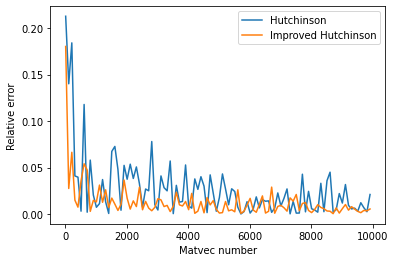

In [43]:
plt.plot(N_iter_arr, er_tr_usual_arr, label = 'Hutchinson')
plt.plot(N_iter_arr, er_tr_improved_arr, label = 'Improved Hutchinson')
plt.legend()
plt.xlabel('Matvec number')
plt.ylabel('Relative error')
plt.show()

2. For random spd matrices with eigenvalues $\lambda_i = i^{-\alpha}$ for several $\alpha$, i.e., for matrices with fast- and slow-decaying spectrum.

In [44]:
import scipy as sc

In [73]:
def spd_matrix_construct(m, alpha):
  lamdas = 1/(np.power(np.arange(1, m + 1),alpha))
  lamdas[:-int(0.5*m)] = 0
  spd_diag = np.diag(lamdas)
  Q, _ = sc.linalg.qr(np.random.rand(m, m))
  spd_matrix = Q.T @ spd_diag @ Q
  return spd_matrix


In [77]:
alphas = [1e-2, 1e-1, 1e0, 1e1, 1e2]

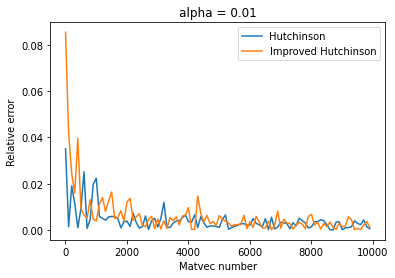

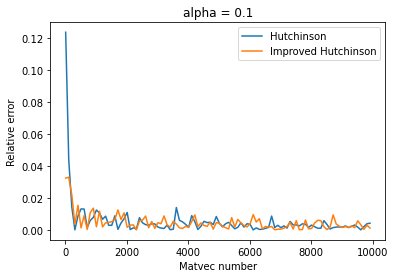

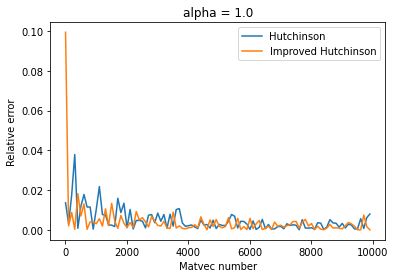

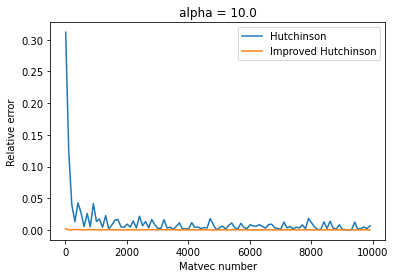

In [79]:
for alpha in alphas:
  m = 50
  B = spd_matrix_construct(m, alpha)
  tr = np.trace(B)
  N_iter = 10000
  er_tr_usual_arr = []
  er_tr_improved_arr = []
  N_iter_arr = []
  for i in range(10,N_iter,100):
    er_tr_usual = abs(tr - hutchinson_normal(B, i))/tr
    er_tr_usual_arr.append(er_tr_usual)
    er_tr_improved = abs(tr - improved_hutchinson_normal(B, i))/tr
    er_tr_improved_arr.append(er_tr_improved)
    N_iter_arr.append(i)
  plt.plot(N_iter_arr, er_tr_usual_arr, label = 'Hutchinson')
  plt.plot(N_iter_arr, er_tr_improved_arr, label = 'Improved Hutchinson')
  plt.legend()
  plt.title(f'alpha = {alpha}')
  plt.xlabel('Matvec number')
  plt.ylabel('Relative error')
  plt.show()

3. Summarize your observations.

Hutchinson's algorithm for normal distribution works well, with low error and at a certain result the error becomes negligibly small, the value of the number of matvec operations can be estimated with Chebyshev norms. But for all that, the regular algorithm performs worse, with a rapid decrease in eigenvalues. The algorithm performs better

# Problem 3 (Universal adversarial attacks) (18 pts) 

## Intro

Suppose we have some classification model $f: X \to Y$ which takes vector $x \in \mathbb{R^n}$ and output some label $y$. It appears that deep neural networks are valunable to small imperceptible perturbations called adversarial attacks. Formally, an adversarial attack is the verctor $\varepsilon \in \mathbb{R^n}$ that leads to misclassification: $y(x) \neq y(x + \varepsilon)$.

<img src="https://openai.com/content/images/2017/02/adversarial_img_1.png" style="display=block; margin:auto">

However, it was shown that there exist universal adversarial perturbations: $\varepsilon \in \mathbb{R^n}$ that leads to misclassification $y(x) \neq y(x + \varepsilon)$ for most of inputs.

The hypetesis is that perturbation of a hidden layer caused by an attack will propagate further in the network changing predicted label of x.

Let $f_i$ be the output of $i$-s hidden layer, then
$$f_i(x + \varepsilon) - f(x) \approx J_i(x)\varepsilon$$
So, to find attack we need to solve the folliwing optimization problem
$$
\max_{\|\varepsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q
$$

## Problem discription

+ Obtain fixed point iteration to solve the problem above using first order optimality condition. **(5 pts)**
+ Suppose additionally that $\varepsilon$ should be sparse: $\|\varepsilon\|_0 \leq k$. Correct the algorithm above using additional truncation operator. **(5 pts)**
+ Implement algorithms 1 and 2. Find universal perturbations on CIFAR dataset using random batch of size 64. Report fooling rate depending on hyperparameters **(8 pts)**
$$
\text{FoolingRate} = \frac{1}{N}\sum\limits_{i = 1}^N \mathbb{1}[y(x + \varepsilon) \neq y(x)]
$$



In [ ]:
import torch
import torch.nn as nn
import requests

Регуляризационный член в денс матрицу

In [ ]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None


def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [ ]:
class CifarNet(nn.Module):
    def __init__(self):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3)

        self.pool = nn.MaxPool2d(2, 2)

        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(3200, 256)
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(-1, 3200)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

file_id = "1qrNvr3eLYjvbkVg5jY2sYA2rqK9XkTXs"
download_file_from_google_drive(file_id, "./cifar_checkpoint.pth")

model = CifarNet().to(device)
model.load_state_dict(torch.load("./cifar_checkpoint.pth", map_location="cpu"))

<All keys matched successfully>

<bound method CifarNet.forward of CifarNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU(inplace=True)
  (fc1): Linear(in_features=3200, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)>

I am sorry, I just start my career in data science track (I am petroleum engineer), and I know nothing about deep learning and CIFA. I idk how solve this problrm T_T

# Problem 4 (Image restoration) (23 pts) 

Image restoration is the task where we need to eliminate blurring and some random noise to get ideal image. Practically, images obtained in real life could be represented in following way:

$$g = f * h + n$$

where $g$ - obtained image of size $(N,N)$, $h$ - blur kernel of size $(3,3)$, $n$ - an additive zero-mean Gaussian white noise, and $f$ - ideal image (deblurred and denoised). In our work we will use gaussian blur kernel with window size 3:

$$h = \frac{1}{16}\begin{pmatrix}1 & 2 & 1\\ 2 & 4 & 2\\ 1 & 2 & 1\end{pmatrix}$$

Here $f*h$ is a 2-d convolution of ideal image with blur kernel, which could be rewritten in matrix format:

$$f * h = H \mathrm{vec}(f)$$

where $H$ - block Toeplitz with Toeplitz blocks matrix which corresponds to 2-d convolution with kernel $h$, $\mathrm{vec}(\cdot)$ - operation of vectorization.

So, let us write the task of finding $f$ as optimization problem:

$$\min\limits_{f,u} \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}}$$
where $\|u\|_{\mathrm{TV}} = \sum\limits_{1\leq j,k\leq N}\|\nabla u_{j,k}\|_2 = \sum\limits_{1\leq j,k\leq N}\sqrt{(u_{j+1,k}-u_{j,k})^2 + (u_{j,k+1}-u_{j,k})^2}$ here we calculate gradients (pixel differences) along **x** and **y** image dimensions.

One can notice that problem could be splitted on two:

$$\min\limits_{u}\min\limits_f \{\|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2\} + \alpha_2\|u\|_{\mathrm{TV}}$$

To find the solution we will use iterative method:

$$\begin{cases}
f^{(i)} = \arg\min\limits_f \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u^{(i-1)})\|_2^2 & (a)\\
u^{(i)} = \arg\min\limits_u \alpha_1\|\mathrm{vec}(f^{(i)}-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}} & (b)
\end{cases}$$

Taking matrix derivative over the minimization functional in subproblem **(a)** we get the system:

$$(H^TH + \alpha_1I)\mathrm{vec}(f) = H^T\mathrm{vec}(g+\alpha_1u^{(i-1)})$$

This system can be solved by conjugate gradient method. Also, taking into account that $H$ is block Toeplitz with Toeplitz blocks (BTTB), we can make fast matrix by vector multiplication.

The subproblem **(b)** could be solved by using any kind of solver of your choice.

**So, your task is to:**

1. Implement creation and fast matrix by vector multiplication for matrix $H$ **(6 pts)**
2. Implement solver for subproblem **(a)** based on conjugate gradient descent using fast matrix by vector multiplication for $H$. **(8 pts)**
3. Implement some solver for subproblem **(b)** **(3 pts)**
4. Implement iterative solver for the total problem using solvers for subproblems **(a)** and **(b)** **(3 pts)**
5. Blur (use defined blurring kernel) given image and add gaussian noise with zero mean and some variance (up to you). Try to restore the image, compare the result with the original one. Make a conclusion. **(3 pts)**


In [ ]:
import numpy as np
def TVnorm(u):
  res = 0
  N = u.shape[0]

  for j in range(N-1):
    for k in range(N-1):
      res += np.power(np.power(u[j+1][k]-u[j][k],2) + np.power(u[j][k]-u[j][k+1],2),0.5)
  return res

Для сабпроблемы 2:

* Показать, что u положительно определеная
* Если это так, сделать CG алгоритм


В первой сабпроблеме имплементировать алгоритм КГ из лекцийё

In [91]:
def deriv(H, g, u, a1 = 1):
  return H.T @ vec(g+a1*u)

In [92]:
from PIL import Image, ImageOps

In [93]:
!wget --no-check-certificate \
    "https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true" \
    -O "/lena.png"

--2022-12-11 19:43:25--  https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/oseledets/nla2022/raw/main/hw2/lena.png [following]
--2022-12-11 19:43:26--  https://github.com/oseledets/nla2022/raw/main/hw2/lena.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oseledets/nla2022/main/hw2/lena.png [following]
--2022-12-11 19:43:26--  https://raw.githubusercontent.com/oseledets/nla2022/main/hw2/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203

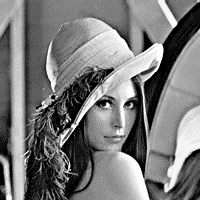

In [94]:
orig_image = ImageOps.grayscale(Image.open("/lena.png"))
orig_image

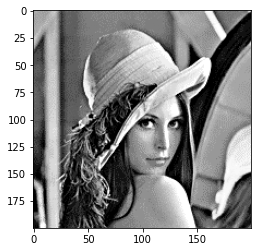

In [95]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/lena.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

In [97]:
from scipy.sparse import lil_matrix
from numpy import zeros
import scipy

def unroll_kernel(kernel, n, sparse=True):
    m = kernel.shape[0]
    if sparse:
         unrolled_K = lil_matrix(((n - m + 1)**2, n**2))
    else:
         unrolled_K = zeros(((n - m + 1)**2, n**2))

    skipped = 0
    for i in range(n ** 2):
         if (i % n) < n - m + 1 and((i / n) % n) < n - m + 1:
             for j in range(m):
                 for l in range(m):
                    unrolled_K[i - skipped, i + j * n + l] = kernel[j, l]
         else:
             skipped += 1
    return unrolled_K

In [98]:
h = np.array([[1,2,1],[2,4,2],[1,2,1]])
h = 1/16 * h
h

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [99]:
def BTTB(f, h):
  m1,n1 = f.shape
  m2,n2 = h.shape

  m = m1 + m2 - 1
  n = n1 + n2 - 1

  '''
  zero-padded matrix creating with (m,n)-shape
  '''
  zero_padded = np.zeros((m,n))
  zero_padded[:m2,:n2] = h

  '''
  creating Toeplitz matrices for each rows
  let's store only rows in t[i]
  '''

  rows = []
  for i in range(zero_padded.shape[0]):
    rows.append(zero_padded[i])


  return rows


In [100]:
M = BTTB(img_gray,h)

In [101]:
M[0].shape

(202,)

In [102]:
T = unroll_kernel(h, 200)

In [103]:
T.diagonal(0)

array([0.0625, 0.0625, 0.0625, ..., 0.    , 0.    , 0.    ])

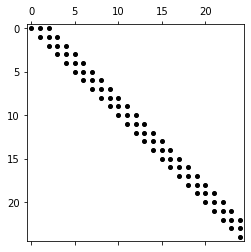

In [104]:
plt.spy(T[:25,:25], marker='.', color='k', markersize=8)

In [105]:
T

<39204x40000 sparse matrix of type '<class 'numpy.float64'>'
	with 352836 stored elements in List of Lists format>

In [106]:
def vec(matrix):
  res = matrix.flatten()
  res = np.reshape(res, (res.shape[0],1))
  return res

In [115]:
from scipy.linalg import hessenberg
from scipy.linalg import qr


In [117]:
m_f,n_f = img_gray.shape
m_h,n_h = h.shape
 
zero_padded_matrix = np.zeros(((m_f + m_h - 1), (n_f + n_h - 1)))


for i in range(m_h):
    for j in range(n_h):
        zero_padded_matrix[i,j] = h[i,j]

rows_arr = []
for i in range(m_f + m_h - 1):
    rows_arr.append(zero_padded_matrix[i,:])

H = []
for i in range(m_f + m_h - 1):
    H_element = np.zeros(((n_f + n_h - 1),n_f))
    for j in range(n_f):
        H_element[:,j] = rows_arr[i].T
        for k in range(n_f-1):
            H_element[:,k+1] = np.roll(H_element[:,k],1,axis = 0)
    H.append(H_element)

hessenberg = H.copy()

img_gray_bigger = np.zeros((202,200))
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        img_gray_bigger[i,j] = img_gray[i,j]

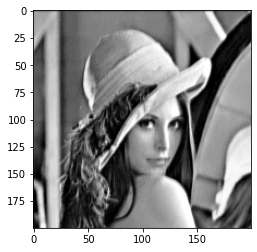

In [118]:
col1, col2, col3 = [], [], []
row1, row2, row3 = [], [], []

for i in range(len(hessenberg)-2):
    col1.append(np.fft.ifft(np.fft.fft(hessenberg[i][:,0]) * np.fft.fft(img_gray_bigger[:,i])))
    col2.append(np.fft.ifft(np.fft.fft(hessenberg[i][:,1]) * np.fft.fft(img_gray_bigger[:,i])))
    col3.append(np.fft.ifft(np.fft.fft(hessenberg[i][:,2]) * np.fft.fft(img_gray_bigger[:,i])))

    row1.append(np.fft.ifft(np.fft.fft(hessenberg[-len(hessenberg)+i][0,:]) * np.fft.fft(img_gray_bigger[i,0:200])))
    row2.append(np.fft.ifft(np.fft.fft(hessenberg[-len(hessenberg)+i][1,:]) * np.fft.fft(img_gray_bigger[i,0:200])))
    row3.append(np.fft.ifft(np.fft.fft(hessenberg[-len(hessenberg)+i][2,:]) * np.fft.fft(img_gray_bigger[i,0:200])))

    hessenberg[i+1][:,0] = np.roll(hessenberg[i][:,0],0,axis = 0)
    hessenberg[i+1][:,1] = np.roll(hessenberg[i][:,1],0,axis = 0)
    hessenberg[i+1][:,2] = np.roll(hessenberg[i][:,2],0,axis = 0)
    hessenberg[i+1][0,:] = np.roll(hessenberg[-len(hessenberg)+i][0,:],0,axis = 0)
    hessenberg[i+1][1,:] = np.roll(hessenberg[-len(hessenberg)+i][1,:],0,axis = 0)
    hessenberg[i+1][2,:] = np.roll(hessenberg[-len(hessenberg)+i][2,:],0,axis = 0)


col1 = np.array(col1)
col2 = np.array(col2)
col3 = np.array(col3)

row1 = np.array(row1)
row2 = np.array(row2)
row3 = np.array(row3)

blur_img = col1[0:200:,1:201].real.T + col2[0:200:,1:201].real.T + col3[0:200:,1:201].real.T + row1[0:200:,0:200].real + row2[0:200:,0:200].real + row3[0:200:,0:200].real

plt.imshow(blur_img, cmap='gray')

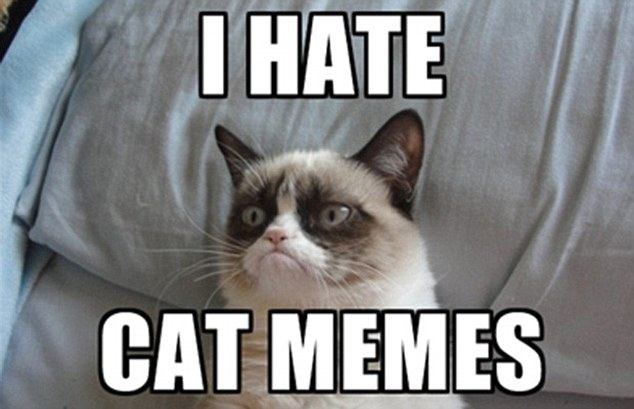